In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [98]:
# configure visuals
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load and Inspect Data

In [99]:
df = pd.read_csv('data/processed/customer_churn_clean.csv')
print("Dataset shape:", df.shape)

Dataset shape: (7043, 21)


In [100]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [101]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,0,dsl,0,1,0,0,0,0,month-to-month,1,electronic check,29.850,29.850,0
1,5575-gnvde,male,0,0,0,34,1,0,dsl,1,0,1,0,0,0,one year,0,mailed check,56.950,1889.500,0
2,3668-qpybk,male,0,0,0,2,1,0,dsl,1,1,0,0,0,0,month-to-month,1,mailed check,53.850,108.150,1
3,7795-cfocw,male,0,0,0,45,0,0,dsl,1,0,1,1,0,0,one year,0,bank transfer (automatic),42.300,1840.750,0
4,9237-hqitu,female,0,0,0,2,1,0,fiber optic,0,0,0,0,0,0,month-to-month,1,electronic check,70.700,151.650,1


## Statistical Summary

### Some stats of the data...

In [102]:
display(df.describe())

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000
mean,0.162,0.483,0.300,32.371,0.903,0.422,0.287,0.345,0.344,0.290,0.384,0.388,0.592,64.762,2283.300,0.265
std,0.369,0.500,0.458,24.559,0.296,0.494,0.452,0.475,0.475,0.454,0.486,0.487,0.491,30.090,2265.000,0.442
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.250,18.800,0.000
25%,0.000,0.000,0.000,9.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,35.500,402.225,0.000
50%,0.000,0.000,0.000,29.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,70.350,1400.550,0.000
75%,0.000,1.000,1.000,55.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,89.850,3786.600,1.000
max,1.000,1.000,1.000,72.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,118.750,8684.800,1.000


### Looking at the categorical columns

In [103]:
# summary of categorical columns
print("\nCategorical Features Summary:")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col}:")
    display(df[col].value_counts()) # get the count of unique values
    print(f"Unique values: {df[col].nunique()}")



Categorical Features Summary:

customerID:


customerID
7590-vhveg    1
3791-lgqcy    1
6008-naixk    1
5956-yhhrx    1
5365-llfyv    1
             ..
9796-mvyxx    1
2637-fkfsy    1
1552-aagrx    1
4304-tspvk    1
3186-ajiek    1
Name: count, Length: 7043, dtype: int64

Unique values: 7043

gender:


gender
male      3555
female    3488
Name: count, dtype: int64

Unique values: 2

InternetService:


InternetService
fiber optic    3096
dsl            2421
no             1526
Name: count, dtype: int64

Unique values: 3

Contract:


Contract
month-to-month    3875
two year          1695
one year          1473
Name: count, dtype: int64

Unique values: 3

PaymentMethod:


PaymentMethod
electronic check             2365
mailed check                 1612
bank transfer (automatic)    1544
credit card (automatic)      1522
Name: count, dtype: int64

Unique values: 4


### Distribution Analysis

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


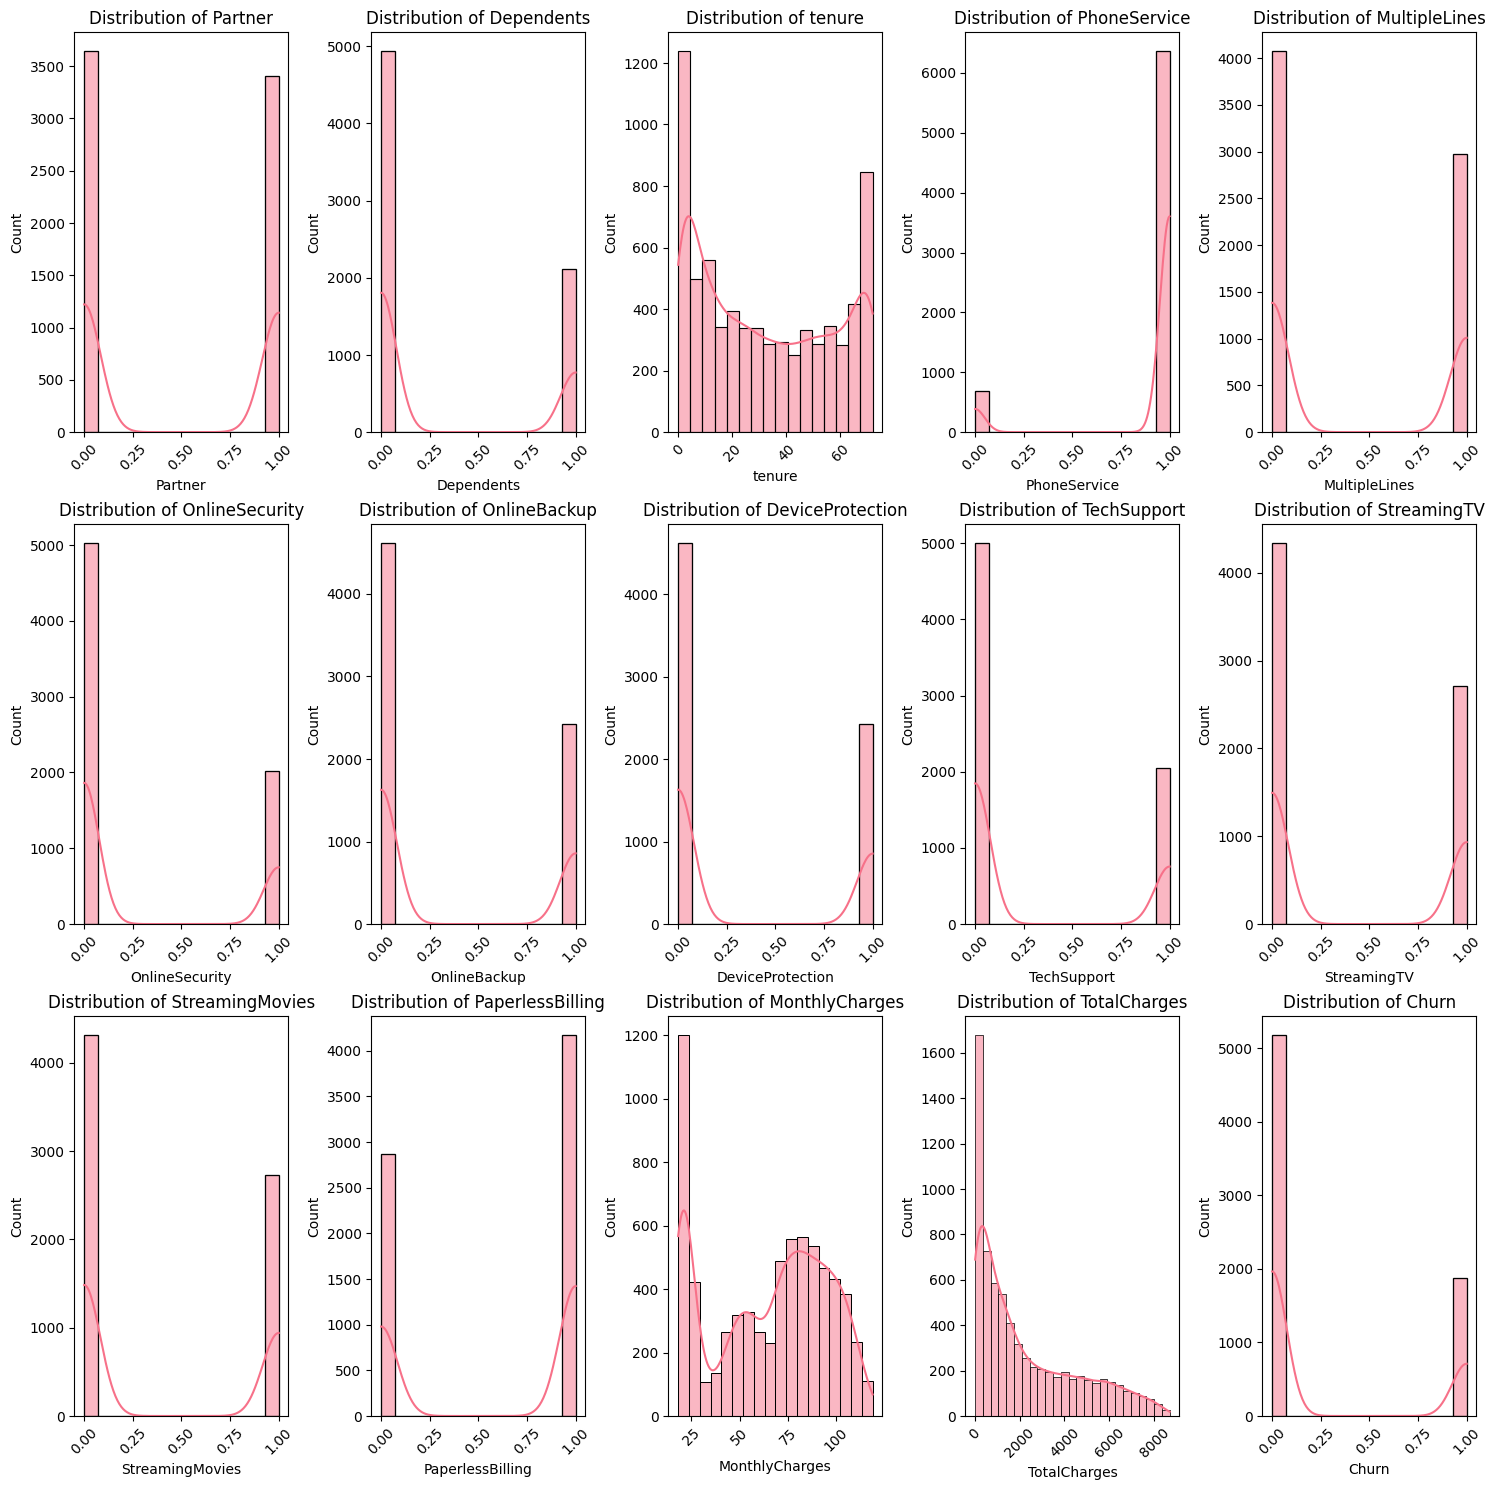

In [104]:
# function to plot distribution for numerical features
def plot_dist(df, columns, rows=3):
    plt.figure(figsize=(15, 5*rows))
    for i, c in enumerate(columns,1):
        plt.subplot(rows, 5, i)
        sns.histplot(data=df,x=c,kde=True)
        plt.title(f'Distribution of {c}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)
plot_dist(df, numerical_cols.delete(0)) # remove the first column as it is a boolean 

### Categorical Analysis

1 gender
2 InternetService
3 Contract
4 PaymentMethod


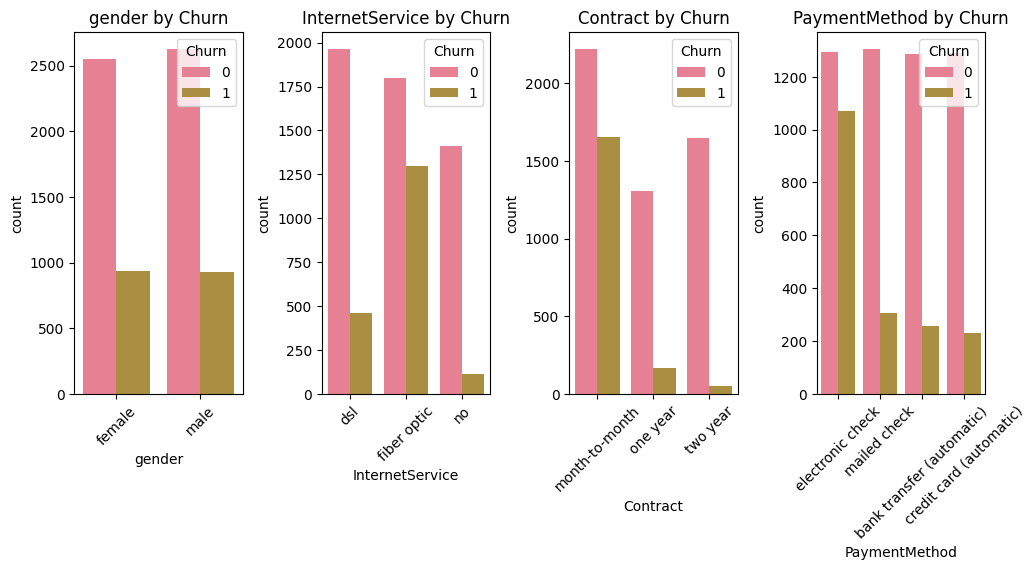

In [105]:
# function to plot distribution of categorical variables
def plot_categorical_features(df, columns, target='Churn', rows=3):
    plt.figure(figsize=(15, 5*rows))
    for i, col in enumerate(columns, 1):
        print(i, col)
        plt.subplot(rows, 6, i)
        sns.countplot(data=df,x=col,hue=target)
        plt.title(f'{col} by {target}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

categorial_columns = df.select_dtypes(include=['object', 'bool']).columns
#print(len(categorial_columns.delete(0)))
plot_categorical_features(df, categorial_columns.delete(0))

### Correlation Matrix

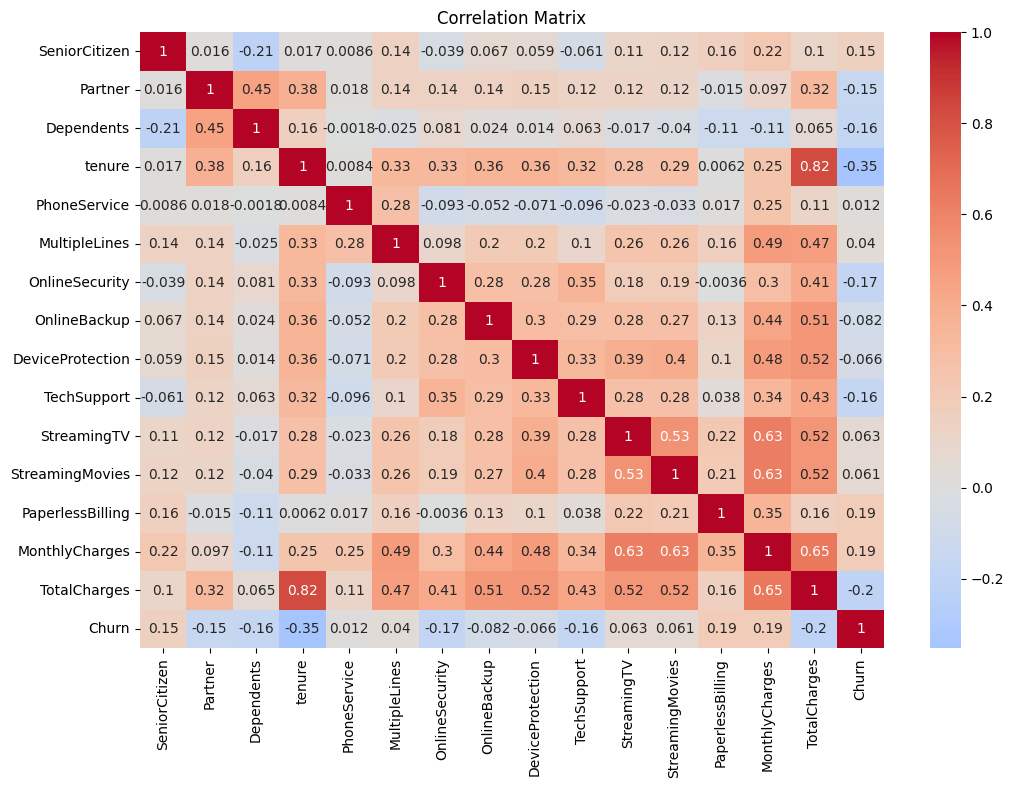

In [106]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [107]:
# save data
df.to_csv('data/processed/customer_churn_clean.csv', index=False)
print("\nCleaned data saved to 'data/processed/customer_churn_clean.csv'")


Cleaned data saved to 'data/processed/customer_churn_clean.csv'


# Feature Relationships

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
def analyze_feature_relationships(X, y, categorial_features=None):
    if categorial_features is None:
        categorial_features = []
    
    # store relationships in dictionary
    relationships = {}
    
    # for numeric features, calculate point bis

# Final Thoughts

#### Correlation Matrix
There is a clear correlation between how long customers would stay with a company and how much they are being charged which makes sense since the lower you have to pay for a service the longer you are likely to stay with said company!

#### Distributions of Numeric data
To reiterate, we can see some patterns in the distribution of **MonthlyCharges** where a clear indication of package pricing exists. Many customers have basic plans where in the distribution we can see a large number of customers with monthly charges around the $20-$30 range. You've got mid-tier, $40-$60 packages where a decent amount of customers have, and finally, a majority of customers seem to have premium-type packages between $70-$100. 

This presents an opportunity in feature engineering where we can categorize different customers based on this package pricing scheme.

**TotalCharges** relates to the total amount charged to a customer which can be assumed to be one-time fees, charges for equipment/equipment replacement, or possibly a charge for a technician or tech support. Based on the distribution, we can see that most of these charges are on the lower side with rare, but valid occurences of charges at higher amounts. 

#### Categorical Analysis
These figures aimed to show the how different variables compared with our target variable, **Churn**. Most of these are pretty intuitive, so I will highlight some interesting ones:

* PhoneService: The likeliood of customer churn is significantly increased if the customer has phone service

* PaperlessBilling: Customers are likely to churn if they have paperlessbilling enabled. This could be due to the lack of review that comes with paperless billing as customers would have to go out their way to check their bill as opposed to it being mailed where you go through your mail every day. If you go through your bills every month then you'd catch any suprise or incorrect charges where if you had paperless, you may not be as diligent in checking the monthly statements and find out one month that you have been overpaying for x amount of months leading to an upset customer.

* Contract: Customers a likely to churn if they have a month-to-month contract, the shortest contract offered. This could be due to customers who only need a particular service for a short period of time and don't continue the service after the contract expires.